In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [6]:
diamonds = sns.load_dataset('diamonds')

#### Exploration

In [7]:
diamonds.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
3863,0.86,Ideal,E,SI2,60.0,56.0,3478,6.22,6.24,3.74
14914,0.80,Ideal,D,VVS2,61.9,56.0,6004,5.91,5.95,3.67
41207,0.51,Premium,E,SI2,62.0,57.0,1205,5.13,5.09,3.17
50497,0.60,Very Good,F,VS2,60.8,56.0,2270,5.45,5.48,3.32
51560,0.70,Very Good,I,VVS1,58.8,61.0,2389,5.78,5.82,3.41


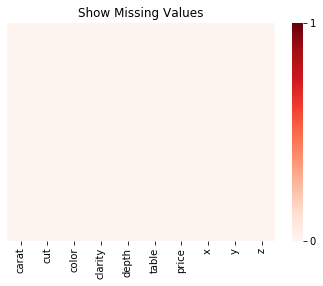

In [12]:
fig, ax = plt.subplots(1,1)
sns.heatmap(diamonds.isna(), ax=ax,
           vmin=0, vmax=1, cmap="Reds",
           cbar_kws={"ticks":[0,1]})
ax.set_yticks([])
ax.set_title("Show Missing Values")
plt.show()

#### Dummies
Let's create dummies - but this time automatically

In [18]:
diamonds = pd.get_dummies(diamonds)
diamonds.sample(5)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
30597,0.31,60.7,56.0,734,4.35,4.38,2.65,0,0,1,...,0,0,0,0,0,0,0,1,0,0
44904,0.55,62.4,57.6,1630,5.23,5.28,3.27,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2607,0.90,60.5,58.0,3220,6.22,6.27,3.78,0,0,0,...,1,0,0,0,1,0,0,0,0,0
22190,1.51,62.8,58.0,10225,7.21,7.28,4.55,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24384,0.41,63.1,54.0,638,4.72,4.75,2.99,0,1,0,...,0,0,0,0,0,1,0,0,0,0


Note that only looking at either aggregate statistics or pairplots might be misleading, doing both is usually good practice. Check https://blog.revolutionanalytics.com/2017/05/the-datasaurus-dozen.html for a look at different data patterns with the same aggregate statistics!

![](https://blog.revolutionanalytics.com/downloads/DataSaurus%20Dozen.gif)

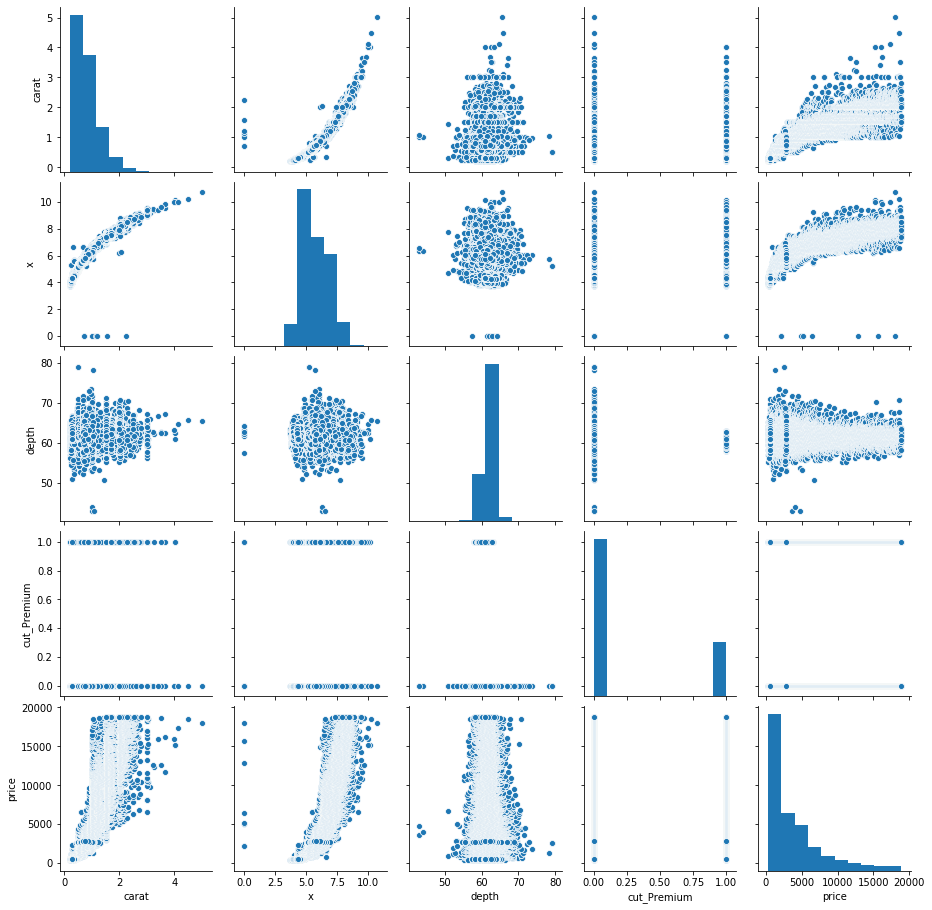

In [23]:
sns.pairplot(diamonds[["carat", "x", "depth", "cut_Premium", "price"]])
plt.show()

In [24]:
diamonds[['carat','x','depth','cut_Premium','price']].corr().style.background_gradient(cmap='coolwarm')

,carat,x,depth,cut_Premium,price
carat,1.000000,0.975094,0.028224,0.116245,0.921591
x,0.975094,1.000000,-0.025289,0.126820,0.884435
depth,0.028224,-0.025289,1.000000,-0.198306,-0.010647
cut_Premium,0.116245,0.126820,-0.198306,1.000000,0.095706
price,0.921591,0.884435,-0.010647,0.095706,1.000000


In [19]:
X = diamonds.drop("price", axis=1)
y = diamonds["price"]

#### Splitting into sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
X_train.describe()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,...,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,0.797661,61.749041,57.453896,5.731252,5.734539,3.538405,0.030033,0.090286,0.398697,0.255787,...,0.101568,0.052439,0.014275,0.033953,0.242598,0.169050,0.151571,0.227660,0.067694,0.093199
std,0.473016,1.431924,2.238077,1.119374,1.144425,0.693190,0.170681,0.286594,0.489637,0.436308,...,0.302083,0.222914,0.118624,0.181111,0.428659,0.374801,0.358609,0.419328,0.251224,0.290715
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.720000,4.720000,2.910000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,79.000000,95.000000,10.740000,58.900000,8.060000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Scaling

In [26]:
st_scaler = StandardScaler()
st_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
X_train_scaled = st_scaler.transform(X_train)

## What's different? 
Nothing - so far!

In [28]:
model = keras.Sequential(
    [layers.Dense(36, activation="relu", input_shape=[X_train.shape[1]]),
    layers.Dense(36, activation="relu"),
     layers.Dense(1)])

In [30]:
optimizer = keras.optimizers.RMSprop(0.001)

In [31]:
model.compile(loss='mse',
             optimizer=optimizer,
             metrics=["mae", "mse"])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                972       
_________________________________________________________________
dense_1 (Dense)              (None, 36)                1332      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 37        
Total params: 2,341
Trainable params: 2,341
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.predict(X_train_scaled[:10])

array([[-0.07158615],
       [ 0.04198436],
       [-0.53886306],
       [-0.04761645],
       [-0.49497348],
       [-0.8571683 ],
       [-0.8940982 ],
       [-0.98905605],
       [-0.6754973 ],
       [-1.3226069 ]], dtype=float32)

In [34]:
epochs = 10

history = model.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Train on 30206 samples, validate on 7552 samples
Epoch 1/10
30206/30206 [==============================] - 27s 891us/sample - loss: 25226065.2614 - mae: 3475.7800 - mse: 25226058.0000 - val_loss: 11356742.4015 - val_mae: 2248.7786 - val_mse: 11356745.0000
Epoch 2/10
30206/30206 [==============================] - 21s 707us/sample - loss: 3996309.9377 - mae: 1280.6572 - mse: 3996308.7500 - val_loss: 1544208.0256 - val_mae: 803.2487 - val_mse: 1544208.2500
Epoch 3/10
30206/30206 [==============================] - 21s 700us/sample - loss: 1225787.8746 - mae: 665.8135 - mse: 1225786.7500 - val_loss: 886665.3964 - val_mae: 589.7004 - val_mse: 886665.3750
Epoch 4/10
30206/30206 [==============================] - 18s 594us/sample - loss: 955273.0006 - mae: 567.2321 - mse: 955273.2500 - val_loss: 777051.6474 - val_mae: 547.7448 - val_mse: 777051.6875
Epoch 5/10
30206/30206 [==============================] - 19s 641us/sample - loss: 901756.5325 - mae: 529.5303 - mse: 901757.2500 - val_loss: 7259

In [36]:
history_df = pd.DataFrame(history.history)
history_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,2.522607e+07,3475.780029,2.522606e+07,1.135674e+07,2248.778564,1.135674e+07
1,3.996310e+06,1280.657227,3.996309e+06,1.544208e+06,803.248657,1.544208e+06
2,1.225788e+06,665.813538,1.225787e+06,8.866654e+05,589.700439,8.866654e+05
3,9.552730e+05,567.232056,9.552732e+05,7.770516e+05,547.744751,7.770517e+05
4,9.017565e+05,529.530273,9.017572e+05,7.259357e+05,512.652161,7.259356e+05
5,8.626775e+05,497.509521,8.626769e+05,6.896915e+05,489.847351,6.896916e+05
6,8.212287e+05,472.278290,8.212286e+05,6.513138e+05,458.750519,6.513138e+05
7,8.040089e+05,448.510559,8.040092e+05,6.268863e+05,443.089386,6.268864e+05
8,7.748687e+05,428.466888,7.748690e+05,5.940913e+05,420.868774,5.940913e+05
9,7.531230e+05,410.248779,7.531225e+05,5.627261e+05,405.272369,5.627261e+05


In [42]:
root_metrics_df = history_df[["mse", "val_mse"]].apply(np.sqrt)
root_metrics_df.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
root_metrics_df

,rmse,val_rmse
0,5022.554928,3369.977003
1,1999.076975,1242.661760
2,1107.152541,941.629107
3,977.380811,881.505353
4,949.608998,852.018522
5,928.804002,830.476708
6,906.216655,807.040117
7,896.665594,791.761564
8,880.266437,770.773191
9,867.826308,750.150693


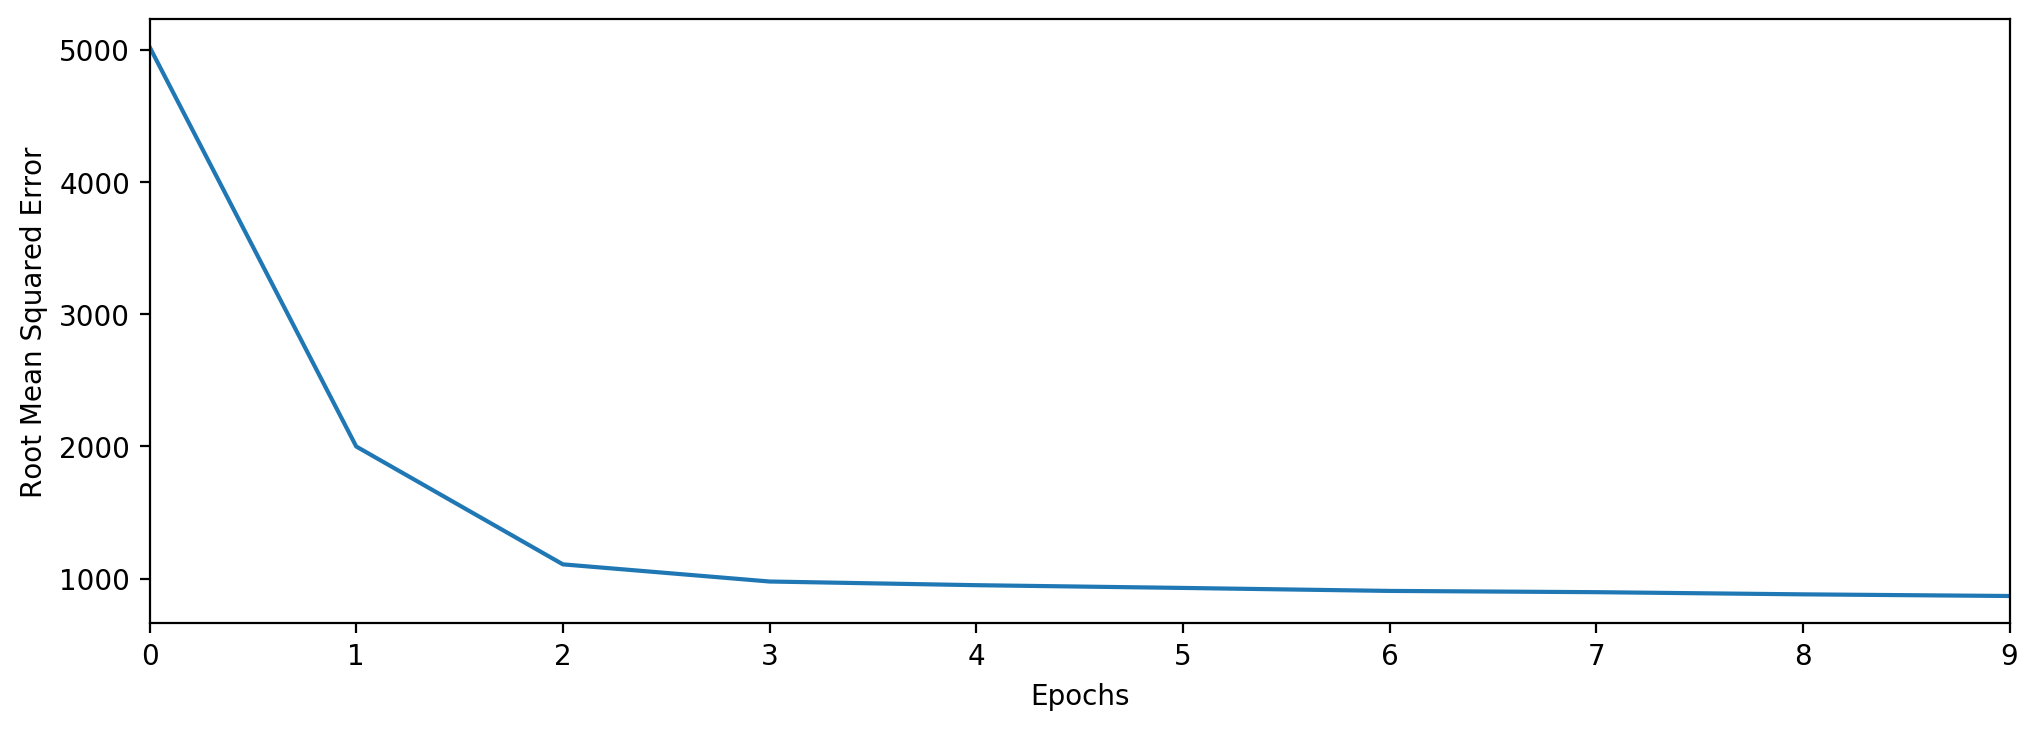

In [45]:
fig, ax = plt.subplots(1,1, figsize=(12,4), dpi=200)

ax.plot(root_metrics_df["rmse"])

ax.set_xlabel("Epochs")
ax.set_ylabel("Root Mean Squared Error")

ax.set_xlim([0, epochs-1])

plt.show()

In [47]:
X_test_scaled = st_scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [48]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

RMSE:  918.9867193324778
MAE:  411.3907535568537


## Let's get a little advanced

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [52]:
def NNRegressor():
    model = keras.Sequential(
    [layers.Dense(36, activation="relu", input_shape=[X_train.shape[1]]),
     layers.Dropout(0.2),
     layers.Dense(36, activation="relu"),
     layers.Dropout(0.2),
     layers.Dense(1)])
    
    optimizer = keras.optimizers.Adam()
    
    model.compile(loss='mse',
                 optimizer = optimizer,
                 metrics=["mae"])
    return model

In [53]:
epochs = 30
batch_size = 500

In [54]:
scaler = RobustScaler()
nn = KerasRegressor(NNRegressor, epochs=epochs, batch_size=batch_size, validation_split=0.2)

In [55]:
pipe = Pipeline([
    ("Robust Scaler", scaler), # fit -> transform
    ("Neural Network", nn) # fit
])

In [56]:
pipe.fit(X_train, y_train.values)

Train on 30206 samples, validate on 7552 samples
Epoch 1/30
30206/30206 [==============================] - 8s 275us/sample - loss: 31162392.5756 - mae: 3925.5063 - val_loss: 30907784.9947 - val_mae: 3886.0286
Epoch 2/30
30206/30206 [==============================] - 4s 148us/sample - loss: 30973552.5480 - mae: 3908.0125 - val_loss: 30503594.2087 - val_mae: 3849.7278
Epoch 3/30
30206/30206 [==============================] - 4s 131us/sample - loss: 30169267.7925 - mae: 3837.4541 - val_loss: 29178334.0456 - val_mae: 3734.35648462
Epoch 4/30
30206/30206 [==============================] - 4s 134us/sample - loss: 28200158.6701 - mae: 3664.6887 - val_loss: 26501527.7013 - val_mae: 3495.1313
Epoch 5/30
30206/30206 [==============================] - 4s 147us/sample - loss: 24826179.3150 - mae: 3351.8140 - val_loss: 22422556.0212 - val_mae: 3104.0759
Epoch 6/30
30206/30206 [==============================] - 4s 121us/sample - loss: 20225922.1543 - mae: 2891.3687 - val_loss: 17397023.6208 - val_ma

Pipeline(memory=None,
         steps=[('Robust Scaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('Neural Network',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x1a532adb90>)],
         verbose=False)

In [57]:
y_pred = pipe.predict(X_test)

In [58]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

RMSE:  1256.868726098157
MAE:  798.1604535091411
